In [ ]:
#Using sklearn.datasets.load_diabetes apply Mutual info Classification and check which are the best columns according to the target column. 
#Then apply Decision tree on that data and try to get best accuracy by changing the hyperparameters.

In [4]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Loading the dataset
data=load_diabetes()

In [6]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [7]:
type(data)   

sklearn.utils.Bunch

In [8]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [9]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [10]:
column_name=data.feature_names

In [11]:
column_name

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [12]:
ps=pd.DataFrame(data.data,columns=column_name) # here data.data is independent variable (column names)

In [13]:
ps

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [14]:
ps['s7']=data.target

In [15]:
ps

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,s7
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [16]:
ps.shape

(442, 11)

In [17]:
ps['s7'].unique()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144., 168.,  68.,  49., 245.,
       184., 202., 137.,  85., 131., 283., 129.,  59., 341.,  87.,  65.,
       102., 265., 276., 252.,  90., 100.,  55.,  61.,  92., 259.,  53.,
       190., 142., 155., 225., 104., 182., 128.,  52.,  37., 170.,  71.,
       163., 150., 160., 178.,  48., 270., 111.,  42., 200., 113., 143.,
        51., 210., 134.,  98., 164.,  96., 162., 279.,  83., 302., 198.,
        95., 232.,  81., 246., 297., 258., 229., 275., 281., 173., 180.,
        84., 121., 161.,  99., 109., 115., 268., 274., 158., 107., 103.,
       272., 280., 336., 317., 235.,  60., 174., 126., 288.,  88., 292.,
       197., 186.,  25., 195., 217., 172., 214.,  70., 220., 152.,  47.,
        74., 295., 127., 237.,  64.,  79.,  91., 116.,  86., 122.,  72.,
        39., 196., 222., 277.,  77., 191.,  73., 263., 248., 296.,  78.,
        93., 208., 108., 154., 124.,  67., 257., 26

In [18]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  s7      442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [19]:
from sklearn.model_selection import train_test_split
X=ps.drop(labels=['s7'],axis=1) # independent variable
y=ps['s7'] # dependent variable

In [20]:
ps

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,s7
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [22]:
from sklearn.feature_selection import mutual_info_classif # determining mutual information
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.01755949, 0.72689753, 0.14712111, 0.02846286, 0.00331345,
       0.        , 0.26799534, 0.16384095, 0.20930146, 0.00222555])

In [23]:
len(mutual_info)

10

In [24]:
mutual_info=pd.Series(mutual_info)

In [25]:
mutual_info

0    0.017559
1    0.726898
2    0.147121
3    0.028463
4    0.003313
5    0.000000
6    0.267995
7    0.163841
8    0.209301
9    0.002226
dtype: float64

In [26]:
X_train.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [27]:
mutual_info.index=X_train.columns

In [28]:
mutual_info

age    0.017559
sex    0.726898
bmi    0.147121
bp     0.028463
s1     0.003313
s2     0.000000
s3     0.267995
s4     0.163841
s5     0.209301
s6     0.002226
dtype: float64

In [29]:
mutual_info.sort_values(ascending=False)

sex    0.726898
s3     0.267995
s5     0.209301
s4     0.163841
bmi    0.147121
bp     0.028463
age    0.017559
s1     0.003313
s6     0.002226
s2     0.000000
dtype: float64

<AxesSubplot:>

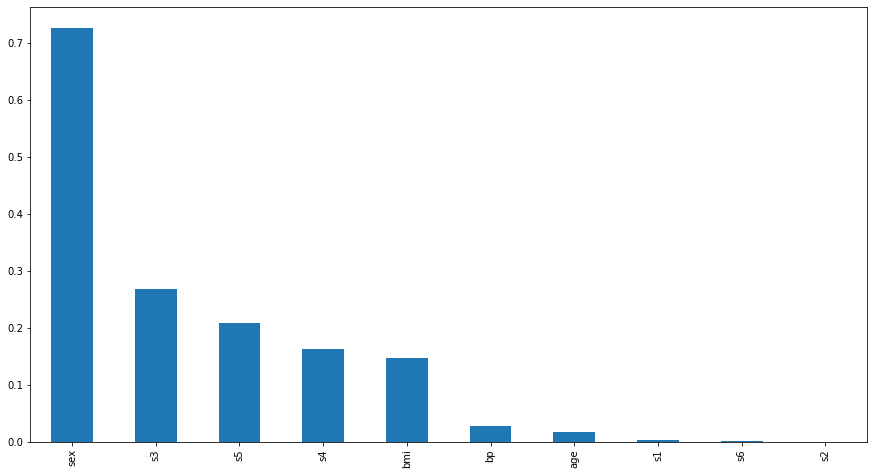

In [30]:
# let's plot the ordered mutual_info values as per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,8))

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
sel_best_cols=SelectKBest(mutual_info_classif,k=6)
sel_best_cols.fit(X_train,y_train)

SelectKBest(k=6,
            score_func=<function mutual_info_classif at 0x000001745D46FA60>)

In [32]:
sel_best_cols.get_support()

array([False,  True,  True,  True, False, False,  True,  True,  True,
       False])

In [33]:
X_train.columns[sel_best_cols.get_support()==True]

Index(['sex', 'bmi', 'bp', 's3', 's4', 's5'], dtype='object')

In [34]:
X_train.columns[sel_best_cols.get_support()==True]
X_train =X_train[['sex','bmi','bp','s3','s4','s5']]
X_train

,sex,bmi,bp,s3,s4,s5
232,0.050680,0.000261,-0.011409,-0.039719,0.056081,0.024053
224,-0.044642,-0.066563,-0.112400,0.000779,-0.039493,-0.035817
252,-0.044642,0.059541,-0.056166,-0.043401,0.050914,-0.004220
254,0.050680,0.056307,0.076958,-0.036038,0.071210,0.120053
418,-0.044642,-0.024529,-0.026328,0.070730,-0.002592,-0.021394
...,...,...,...,...,...,...
323,0.050680,-0.007284,0.049415,-0.054446,0.108111,0.129019
192,0.050680,-0.030996,0.008101,0.033914,-0.039493,-0.029528
117,-0.044642,-0.021295,0.087287,-0.047082,0.071210,0.079121
47,-0.044642,-0.073030,-0.057314,-0.024993,-0.039493,-0.018118


In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [41]:
# Applying Decision Tree to the data
# Modeling
from sklearn.tree import DecisionTreeClassifier
drugTree=DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [42]:
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [45]:
# Prediction
y_pred = drugTree.predict(X_test)

In [46]:
print(y_pred[0:5]) # predicted by ML model
print(y_test[0:5]) # actual values we have

[185. 242.  25.  52.  52.]
362    321.0
249    215.0
271    127.0
435     64.0
400    175.0
Name: s7, dtype: float64


In [50]:
# Evaluation (To check accuracy)
from sklearn import metrics
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test,y_pred))

Decision Tree Accuracy: 0.015037593984962405


In [ ]:
# Using sklearn.datasets.load_boston apply Mutual info Regression and check which are the best columns according to the target column. 
# Then apply MultiLinear Regression on that data and try to get best accuracy by changing the hyperparameters

In [51]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# Loading the dataset
data=load_boston()

In [53]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [54]:
type(data) 

sklearn.utils.Bunch

In [56]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [57]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [58]:
col_name=data.feature_names

In [59]:
col_name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [60]:
tf=pd.DataFrame(data.data,columns=col_name) # here data.data is independent variable (column names)

In [61]:
tf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [62]:
tf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [65]:
tf['MEDV']=data.target

In [66]:
tf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [67]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [68]:
from sklearn.model_selection import train_test_split
X=tf.drop(labels=['MEDV'],axis=1) # independent variable
y=tf['MEDV'] # dependent variable

In [69]:
tf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [71]:
from sklearn.feature_selection import mutual_info_regression # determining mutual information
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info

array([0.33276095, 0.19818945, 0.53690611, 0.02466102, 0.44703008,
       0.59232803, 0.33891882, 0.31070425, 0.22138554, 0.37264334,
       0.50284443, 0.169348  , 0.65284998])

In [72]:
X_train.columns 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [74]:
# Converting arrays into series
mutual_info = pd.Series(mutual_info)
mutual_info

0     0.332761
1     0.198189
2     0.536906
3     0.024661
4     0.447030
5     0.592328
6     0.338919
7     0.310704
8     0.221386
9     0.372643
10    0.502844
11    0.169348
12    0.652850
dtype: float64

In [76]:
type(mutual_info)

pandas.core.series.Series

In [77]:
mutual_info.index

RangeIndex(start=0, stop=13, step=1)

In [79]:
mutual_info.index=X_train.columns
mutual_info # change index to column names

CRIM       0.332761
ZN         0.198189
INDUS      0.536906
CHAS       0.024661
NOX        0.447030
RM         0.592328
AGE        0.338919
DIS        0.310704
RAD        0.221386
TAX        0.372643
PTRATIO    0.502844
B          0.169348
LSTAT      0.652850
dtype: float64

In [80]:
mutual_info.sort_values(ascending=False)# sorting values orderly.

LSTAT      0.652850
RM         0.592328
INDUS      0.536906
PTRATIO    0.502844
NOX        0.447030
TAX        0.372643
AGE        0.338919
CRIM       0.332761
DIS        0.310704
RAD        0.221386
ZN         0.198189
B          0.169348
CHAS       0.024661
dtype: float64

<AxesSubplot:>

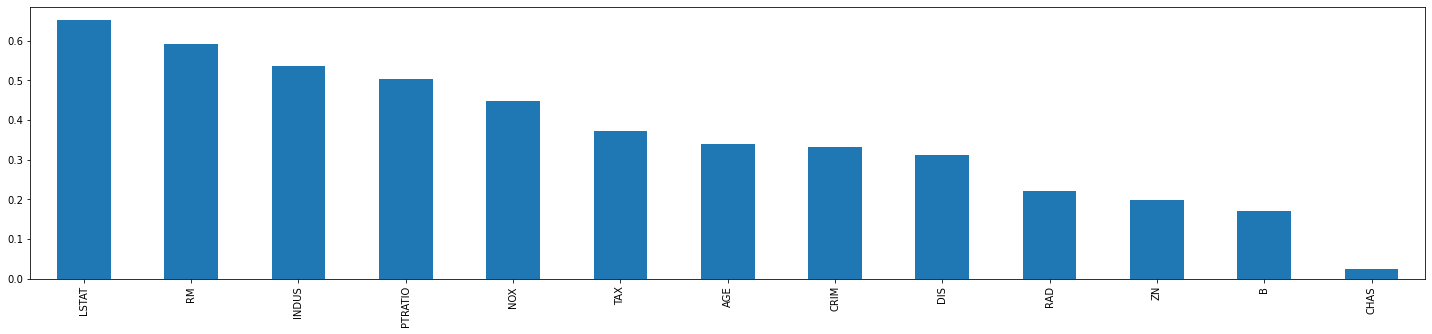

In [81]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(25,5))

In [82]:
# Selecting the best column,based on the threshold,whose contribution is >30%
def select_columns(MI,threshold):
    columns=[]
    for i in range(len(MI)):
        if MI[i]>threshold:
            columns.append(MI.index[i])
    print(columns)        
    return columns

In [83]:
good_columns = select_columns(mutual_info,0.30)

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']


In [84]:
# here we are getting columns,which are contributing 30%
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [85]:
X_train=X_train[good_columns]

In [86]:
X_train

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
141,1.62864,21.89,0.624,5.019,100.0,1.4394,437.0,21.2,34.41
272,0.11460,6.96,0.464,6.538,58.7,3.9175,223.0,18.6,7.73
135,0.55778,21.89,0.624,6.335,98.2,2.1107,437.0,21.2,16.96
298,0.06466,2.24,0.400,6.345,20.1,7.8278,358.0,14.8,4.97
122,0.09299,25.65,0.581,5.961,92.9,2.0869,188.0,19.1,17.93
...,...,...,...,...,...,...,...,...,...
323,0.28392,7.38,0.493,5.708,74.3,4.7211,287.0,19.6,11.74
192,0.08664,3.44,0.437,7.178,26.3,6.4798,398.0,15.2,2.87
117,0.15098,10.01,0.547,6.021,82.6,2.7474,432.0,17.8,10.30
47,0.22927,6.91,0.448,6.030,85.5,5.6894,233.0,17.9,18.80


In [87]:
# Applying MultiLinear Regression
dd=tf[['CRIM','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','LSTAT']]

In [88]:
dd.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33


In [90]:
import numpy as np
msk=np.random.rand(len(dd))<0.6

In [91]:
type(msk)

numpy.ndarray

In [92]:
newmsk=list(msk)

In [93]:
newmsk.count(True)

295

In [94]:
newmsk.count(False)

211

In [95]:
len(newmsk)

506

In [97]:
train=dd[msk]
test=dd[~msk]

In [98]:
train.shape

(295, 9)

In [99]:
train

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33
5,0.02985,2.18,0.458,6.430,58.7,6.0622,222.0,18.7,5.21
...,...,...,...,...,...,...,...,...,...
497,0.26838,9.69,0.585,5.794,70.6,2.8927,391.0,19.2,14.10
499,0.17783,9.69,0.585,5.569,73.5,2.3999,391.0,19.2,15.10
500,0.22438,9.69,0.585,6.027,79.7,2.4982,391.0,19.2,14.33
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,9.08


In [100]:
test

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98
6,0.08829,7.87,0.524,6.012,66.6,5.5605,311.0,15.2,12.43
11,0.11747,7.87,0.524,6.009,82.9,6.2267,311.0,15.2,13.27
13,0.62976,8.14,0.538,5.949,61.8,4.7075,307.0,21.0,8.26
19,0.72580,8.14,0.538,5.727,69.5,3.7965,307.0,21.0,11.28
...,...,...,...,...,...,...,...,...,...
494,0.27957,9.69,0.585,5.926,42.6,2.3817,391.0,19.2,13.59
498,0.23912,9.69,0.585,6.019,65.3,2.4091,391.0,19.2,12.92
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,9.67
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,5.64


In [103]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
x=np.asanyarray(train[['CRIM','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO']]) # independent variable
y=np.asanyarray(train[['LSTAT']]) # dependent variable
reg.fit(x,y)

LinearRegression()

In [104]:
print("Intercept:",reg.intercept_)
print("Coefficient:",reg.coef_)

Intercept: [22.71736349]
Coefficient: [[ 8.52618769e-02  6.23332846e-02  1.20885138e+01 -4.54005901e+00
   8.71320781e-02  4.31530790e-01 -2.69139335e-04  1.80124355e-01]]


In [105]:
test.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98
6,0.08829,7.87,0.524,6.012,66.6,5.5605,311.0,15.2,12.43
11,0.11747,7.87,0.524,6.009,82.9,6.2267,311.0,15.2,13.27
13,0.62976,8.14,0.538,5.949,61.8,4.7075,307.0,21.0,8.26
19,0.72580,8.14,0.538,5.727,69.5,3.7965,307.0,21.0,11.28


In [106]:
# Prediction

from sklearn.metrics import r2_score
x_test=test[['CRIM','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO']]
y_test=test[['LSTAT']]

In [109]:
y_hat=reg.predict(x_test)
y_hat

array([[ 9.6368345 ],
       [13.11171192],
       [14.83555872],
       [13.88943964],
       [15.18331375],
       [18.43353148],
       [15.92316944],
       [17.60168763],
       [14.15419425],
       [17.6132188 ],
       [10.13612745],
       [12.00777986],
       [ 6.55995465],
       [12.1728398 ],
       [ 3.57975485],
       [ 8.84959448],
       [10.01633381],
       [ 8.03900117],
       [ 6.39805875],
       [ 8.51673117],
       [ 5.9453758 ],
       [ 9.94827537],
       [ 6.22876756],
       [ 8.9334802 ],
       [10.22690408],
       [ 9.93903718],
       [ 8.3737327 ],
       [12.39764799],
       [ 7.92188623],
       [ 4.73566393],
       [10.83047046],
       [ 9.86683237],
       [12.75119578],
       [14.1407335 ],
       [13.73198937],
       [13.98539767],
       [12.51069425],
       [14.10355695],
       [15.75306401],
       [16.12950691],
       [15.54752032],
       [15.98172213],
       [18.30022983],
       [18.85837225],
       [17.37219963],
       [15

In [110]:
y_test = np.asanyarray(y_test) # actual value

In [113]:
print("Residual sum of squares:",np.mean((y_hat - y_test)**2))
print("R2_Score:",r2_score(y_hat,y_test))

Residual sum of squares: 19.82317086823267
R2_Score: 0.3656982874744781
